# Main experimental results

Code to generate figures 2 and 3 and Supplementary tables S6-S8.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm

sns.set(style="ticks", context='poster')
%matplotlib inline


RANDOM_SEED = 8927

Code to estimate $p$ for a Bernoulli process, used to estimate bais of switching between the predatory and the non-predatory moith forms for eachs strain.

In [37]:
def find_binom_HDI(count_data, strain, diet=False):
    if not diet:
        n_success = count_data[count_data['Strain'] == strain]['Eu'].sum()
        total = count_data[count_data['Strain'] == strain]['Total'].sum()
    else:
        n_success = count_data[(count_data['Strain'] == strain) & (count_data['Culture']==diet)]['Eu'].sum()
        total = count_data[(count_data['Strain'] == strain) & (count_data['Culture']==diet)]['Total'].sum()
    data_0 = np.zeros(total - n_success)
    data_1 = np.ones(n_success)
    data = np.concatenate((data_0, data_1))
    with pm.Model() as bin_model:
        p = pm.Beta('p', alpha=1., beta=1.)
        obs = pm.Bernoulli('obs', p=p, observed =data)
        trace = pm.sample(10000, tune=10000, random_seed=RANDOM_SEED, return_inferencedata=False)
        stat_results = az.summary(trace, round_to=2, hdi_prob=0.95)
        az.plot_trace(trace)
    return stat_results

Code to compare two groups using Kruschke's BEST (Bayesian estimation supersedes the t test) method (Kruschke 2013).

In [47]:
def bayesian_robust_two_groups(sample_1, sample_2, step=4000):
    pooled = np.concatenate([sample_1, sample_2])
    m_s = np.mean(pooled)
    std_s = np.std(pooled) * 2
    σ_low = 1
    σ_high = 300
    n1 = len(sample_1)
    n2 = len(sample_2)
    with pm.Model() as model:
        group1_mean = pm.Normal("group1_mean", mu=m_s, sd=std_s)
        group2_mean = pm.Normal("group2_mean", mu=m_s, sd=std_s)
        group1_std = pm.Uniform("group1_std", lower=σ_low, upper=σ_high)
        group2_std = pm.Uniform("group2_std", lower=σ_low, upper=σ_high)
        ν = pm.Exponential("ν_minus_one", 1 / 29.0) + 1
        λ1 = group1_std ** -2
        λ2 = group2_std ** -2
        group1 = pm.StudentT("observed1", nu=ν, mu=group1_mean, lam=λ2, observed=sample_1)
        group2 = pm.StudentT("observed2", nu=ν, mu=group2_mean, lam=λ1, observed=sample_2)
        diff_of_means = pm.Deterministic("difference of means", group1_mean - group2_mean)
        diff_of_stds = pm.Deterministic("difference of stds", group1_std - group2_std)
        effect_size = pm.Deterministic(
            "effect size", diff_of_means / np.sqrt((group1_std ** 2 * (n1 - 1) + group2_std ** 2 * (n2 - 1)) / (n1 + n2 - 2)))

        
    with model:
        trace = pm.sample(10000, tune=step, random_seed=RANDOM_SEED, return_inferencedata=False)
    with model:
        stat_results = az.summary(trace, round_to=2, hdi_prob=0.95)
    with model:
        data = az.convert_to_dataset(trace)
    diff_dist = np.array(data['difference of means']).flatten()
    prop = np.round(len([i for i in diff_dist if i > 0])/len(diff_dist), decimals=2)
    return stat_results, prop

### Figure 2b

In [4]:
MF_counts = pd.read_csv('raw_data/MF_count_2.csv')

In [5]:
strains = ['RS5348', 'RSA133', 'RSA622', 'RSA645', 'RSC019', 'RSC033', 'RSD029']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains i

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains i

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 19 seconds.


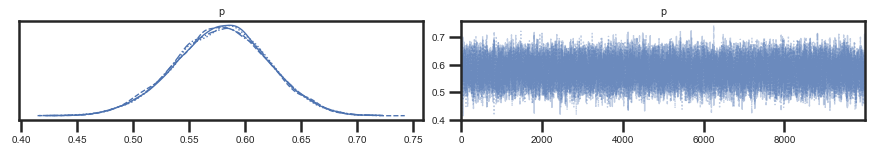

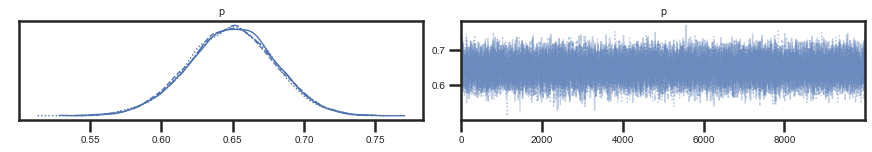

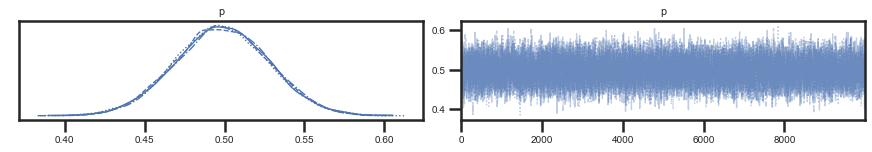

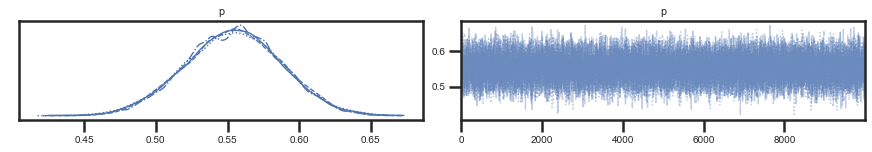

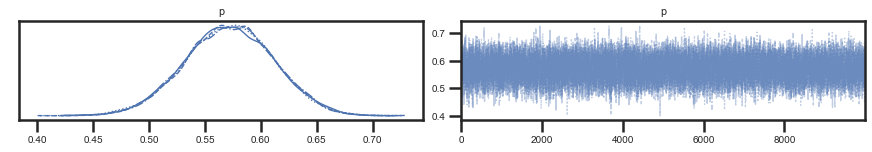

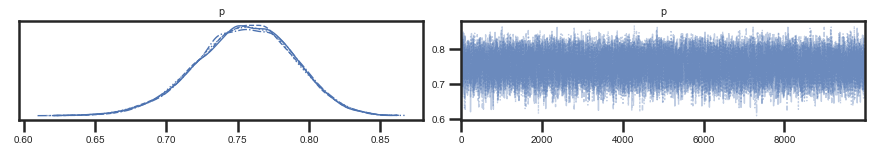

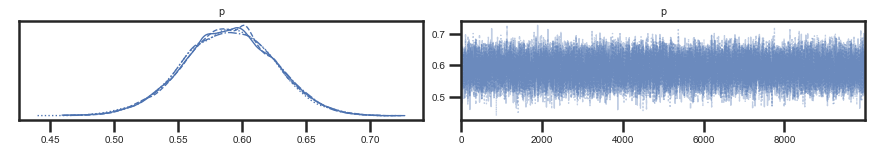

In [6]:
data = {}
for i in strains:
    data[i] = find_binom_HDI(MF_counts, i)

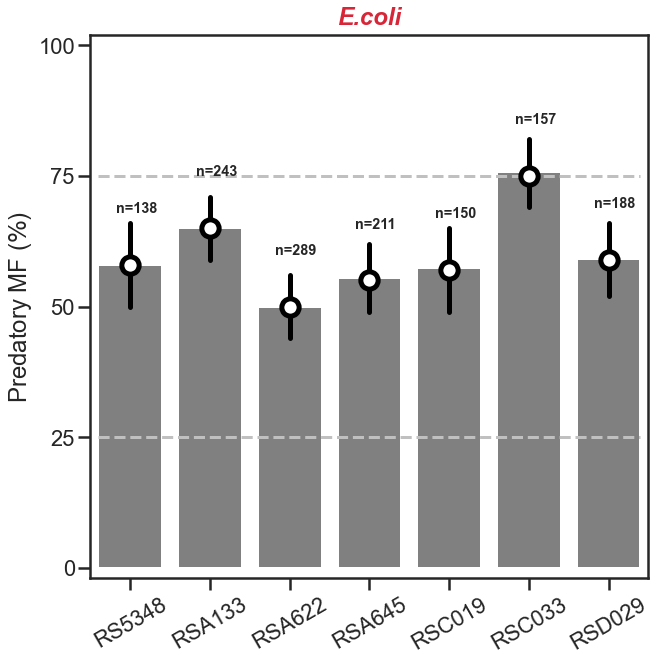

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

space=0
for i in strains:
    plt.vlines(space, float(data[i]['hdi_2.5%']), float(data[i]['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(space, float(data[i]['mean']), zorder=3, s=300, edgecolors='black', color='white', linewidths=5)
    txt = 'n='+str(MF_counts[MF_counts['Strain'] == i]['Total'].sum())
    plt.text(space-0.18, float(data[i]['mean'])+0.1, txt, fontsize='x-large', fontweight='heavy')
    space += 1
plt.ylim(-0.02,1.02)
plt.xlim(-0.5, 6.5)
plt.ylabel(r'Predatory MF ($\%$)')
ax.set_xticks(np.arange(0, 7, 1))
ax.set_xticklabels(strains, rotation=30)

heights = [MF_counts[MF_counts['Strain'] == i]['Eu'].sum()/MF_counts[MF_counts['Strain'] == i]['Total'].sum() for i in strains]
plt.bar(range(7), heights, zorder=1, color='gray')


ax.set_yticks(np.linspace(0,1, 5))
ax.set_yticklabels([0, 25, 50, 75, 100])

# plt.hlines(0.5, -0.2, 6.2, zorder=0, linestyles='--', color='silver')
plt.hlines(0.75, -0.4, 6.4, zorder=2, linestyles='--', color='silver')
plt.hlines(0.25, -0.4, 6.4, zorder=2, linestyles='--', color='silver')
ax.set_title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)

plt.savefig('./fig2b.jpeg', bbox_inches='tight', dpi=300)

### Figure 2c

In [13]:
intra_strain_f = pd.read_excel('./raw_data/fig2/fecundity_within_strain.xlsx')

In [14]:
strains = ['RS5348', 'RSA113', 'RSA622', 'RSA645', 'RSC019', 'RSC033', 'RSD029']
stat_dic = {}
diff_positive = {}
for strain in strains:
    sample_1 = intra_strain_f[(intra_strain_f['Strain']==strain) & (intra_strain_f['MF']=='St')]['Fecundity']
    sample_2 = intra_strain_f[(intra_strain_f['Strain']==strain) & (intra_strain_f['MF']=='Eu')]['Fecundity']
    output = bayesian_robust_two_groups(sample_1, sample_2)
    stat_dic[strain], diff_positive[strain] = output

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains i

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 25 seconds.


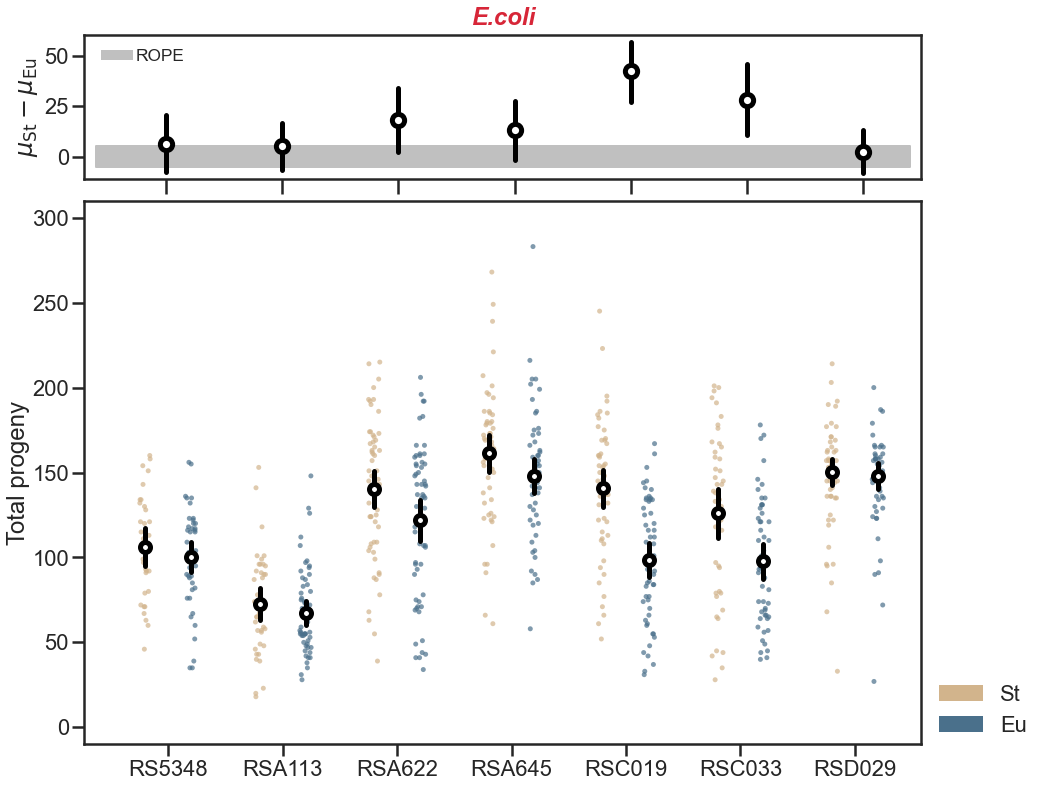

In [15]:
fig = plt.figure(figsize=(15,10))

g = sns.stripplot(data=intra_strain_f, x="Strain", y="Fecundity", hue="MF",palette={"Eu": "#4a708bff", "St": "#d2b48cff"}, zorder=0, hue_order=['St', 'Eu'], dodge=True, alpha=0.7)
space = 0
for i in strains:
    plt.vlines(-0.2+space, stat_dic[i]['hdi_2.5%']['group1_mean'], stat_dic[i]['hdi_97.5%']['group1_mean'],  colors='black', linestyles='-', linewidth=5, capstyle='round',clip_on=False, zorder=10)
    plt.scatter(-0.2+space, stat_dic[i]['mean']['group1_mean'], s=100, edgecolors='black', color='white', linewidths=5, zorder=12)
    plt.vlines(0.2+space, stat_dic[i]['hdi_2.5%']['group2_mean'], stat_dic[i]['hdi_97.5%']['group2_mean'],  colors='black', linestyles='-', linewidth=5, capstyle='round',clip_on=False, zorder=10)
    plt.scatter(0.2+space, stat_dic[i]['mean']['group2_mean'], s=100, edgecolors='black', color='white', linewidths=5, zorder=12)
    space += 1

plt.xlabel(r' ',labelpad=0)
plt.ylabel(r'Total progeny',labelpad=2)

plt.bar(0,0, edgecolor='black',linewidth=0, color= "#d2b48cff", label="St")
plt.bar(0,0, edgecolor='black',linewidth=0, color= "#4a708bff", label="Eu")

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles[2:], labels[2:], loc=(1.01,0),frameon=False, edgecolor='white')

plt.ylim(-10, 310)

ax2 = fig.add_axes([0.125, 0.91, 0.775, 0.2])
space=0
for i in strains:
    ax2.vlines(space, stat_dic[i]['hdi_2.5%']['difference of means'], stat_dic[i]['hdi_97.5%']['difference of means'],  colors='black', linestyles='-', linewidth=5, capstyle='round',clip_on=False, zorder=10)
    ax2.scatter(space, stat_dic[i]['mean']['difference of means'], s=150, edgecolors='black', color='white', linewidths=5, zorder=12)
    space+= 1
x = np.linspace(-0.6, 6.4, 10)
ax2.fill_between(x, [5 for i in x], [-5 for i in x], color='silver')
ax2.bar(-10,0, color= "silver", label="ROPE")

ax2.legend(loc=(0.01,0.75),frameon=False, edgecolor='white', fontsize='xx-large', handletextpad=0.1)
ax2.set_xlim(-0.7, 6.5)
ax2.set_xticks(np.arange(0, len(strains), 1))
ax2.set_xticklabels([])
ax2.tick_params(axis='x', length=15)

ax2.set_ylabel(r'$\mu_{\mathrm{St}} - \mu_{\mathrm{Eu}}$')

ax2.set_title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)


plt.savefig('./fig2c.jpeg', bbox_inches='tight', dpi=300)

### Table S6

In [16]:
df = pd.concat([stat_dic[i] for i in strains], axis=0, keys=strains)

In [17]:
df.style.to_latex('./fig2c_stat.tex')

### Figure 2d

In [18]:
MF_counts_2 = pd.read_csv('./raw_data/MF_count_3.csv')

In [19]:
MF_counts_2['Eu_pre'] = MF_counts_2['Eu']/MF_counts_2['Total']

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 20 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 18 seconds.


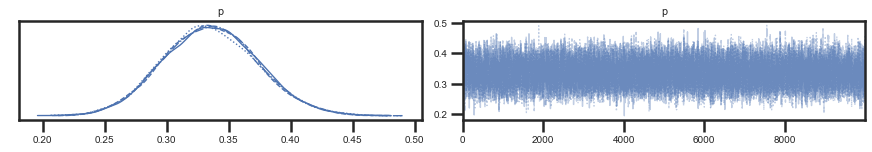

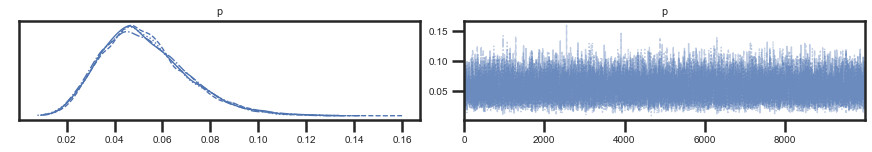

In [21]:
strains = ['RSC011', 'RSC017']

data = {}
for i in strains:
    data[i] = find_binom_HDI(MF_counts_2, i)

<Figure size 432x288 with 0 Axes>

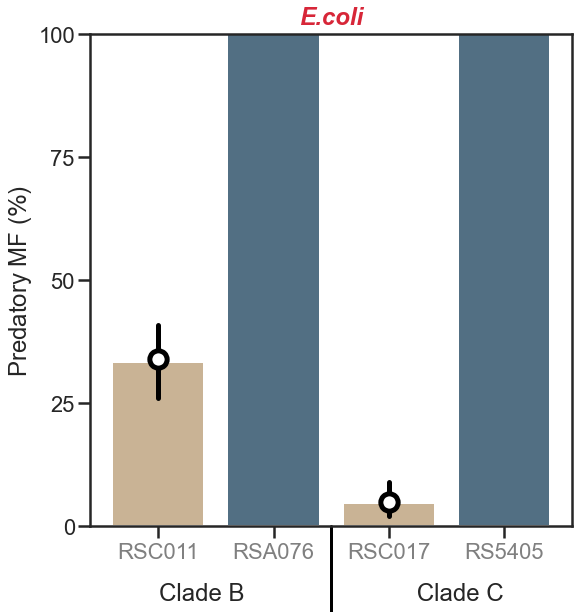

In [22]:
fig = plt.figure()

g = sns.catplot(data=MF_counts_2, aspect=1, ci = None, palette= ["#d2b48cff" , "#4a708bff", "#d2b48cff", "#4a708bff"], order=['RSC011','RSA076', 'RSC017', 'RS5405'], x="Strain", y='Eu_pre',  kind="bar", alpha=1, height=8,clip_on=True)
g.set_xticklabels(rotation=0, color='grey')


plt.bar(0,0, color= "#4a708bff", label="Eu biased")
plt.bar(0,0, color= "#d2b48cff", label="St biased")

plt.yticks(np.linspace(0,1, 5), labels=[0, 25, 50, 75, 100])

space=0
for i in strains:
    plt.vlines(space, float(data[i]['hdi_2.5%']), float(data[i]['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
    plt.scatter(space, float(data[i]['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)
    space += 2

plt.vlines(1.5, -30,0,  colors='black', linestyles='-', linewidth=3, capstyle='round',clip_on=False)

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)


plt.ylim(0, 1)
g.set_ylabels(r'Predatory MF ($\%$)')
g.set_xlabels(r'Clade B                          Clade C', labelpad=20)

plt.title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)
plt.savefig('./fig2d.jpeg', bbox_inches='tight', dpi=300)

### Figure 2e

In [23]:
fec_clades = pd.read_excel('./raw_data/fig2/fecundity_between_strains.xlsx')

In [24]:
strains = [('RSC011', 'RSA076'), ('RSC017', 'RS5405'), ('RSC011', 'RS5405'), ('RSC017', 'RSA076')]
stat_dic = {}
diff_positive = {}
for strain in strains:
    sample_1 = fec_clades[fec_clades['Strain']==strain[0]]['Progeny Count']
    sample_2 = fec_clades[fec_clades['Strain']==strain[1]]['Progeny Count']
    output = bayesian_robust_two_groups(sample_1, sample_2)
    stat_dic[strain], diff_positive[strain] = output

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains i

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 4_000 tune and 10_000 draw iterations (16_000 + 40_000 draws total) took 27 seconds.


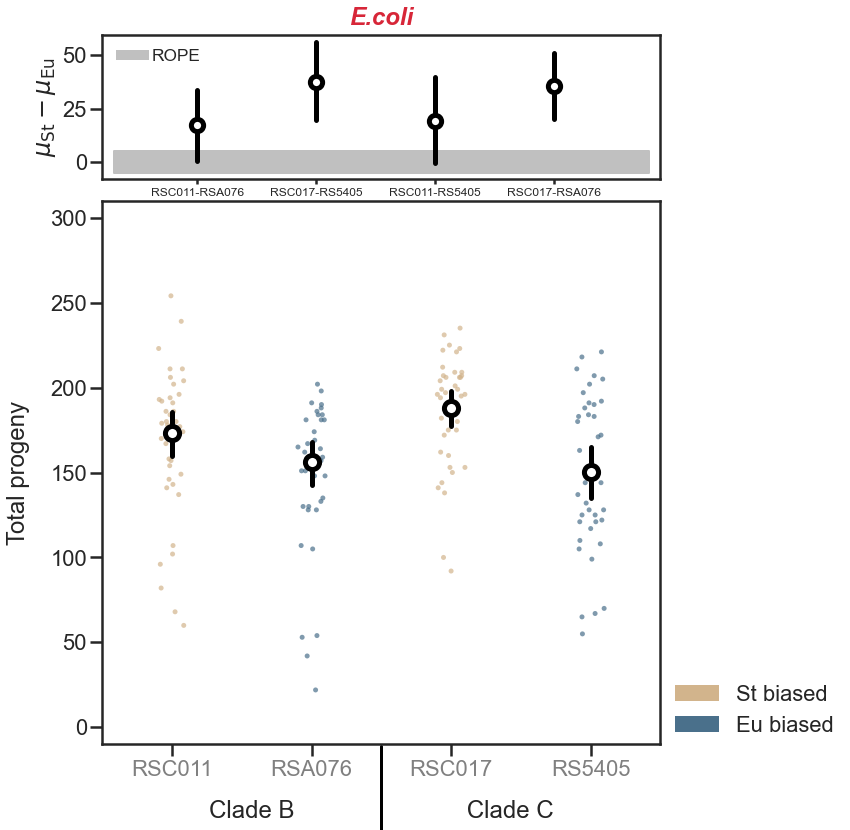

In [25]:
fig = plt.figure(figsize=(10,10))

g = sns.stripplot(data=fec_clades, x="Strain", y="Progeny Count",palette= ["#d2b48cff" , "#4a708bff", "#d2b48cff", "#4a708bff"], order=['RSC011','RSA076', 'RSC017', 'RS5405'], zorder=0, dodge=True, alpha=0.7)

space=0
for i in [('RSC011', 'RSA076'), ('RSC017', 'RS5405')]:
    plt.vlines(space, float(stat_dic[i]['hdi_2.5%']['group1_mean']), float(stat_dic[i]['hdi_97.5%']['group1_mean']),  colors='black', linestyles='-', linewidth=5, capstyle='round', clip_on=False, zorder=2)
    plt.scatter(space, float(stat_dic[i]['mean']['group1_mean']), zorder=2, s=200, edgecolors='black', color='white', linewidths=5)
    plt.vlines(space+1, float(stat_dic[i]['hdi_2.5%']['group2_mean']), float(stat_dic[i]['hdi_97.5%']['group2_mean']),  colors='black', linestyles='-', linewidth=5, capstyle='round', clip_on=False, zorder=2)
    plt.scatter(space+1, float(stat_dic[i]['mean']['group2_mean']), zorder=2, s=200, edgecolors='black', color='white', linewidths=5)
    space += 2
    
plt.xlabel(r'Wild isolates',labelpad=20)
plt.ylabel(r'Total progeny',labelpad=20)
plt.ylim(0, 300)
plt.xlabel(r'Clade B                          Clade C', labelpad=20)
plt.vlines(1.5, -70, -11,  colors='black', linestyles='-', linewidth=3, capstyle='round',clip_on=False)
plt.xticks(color='grey')

plt.bar(0,0, edgecolor='black',linewidth=0, color= "#d2b48cff", label="St biased")
plt.bar(0,0, edgecolor='black',linewidth=0, color= "#4a708bff", label="Eu biased")


plt.legend(loc=(1.01,0),frameon=False)

plt.ylim(-10, 310)
plt.xlim(-0.5,3.5)

ax2 = fig.add_axes([0.125, 0.91, 0.775, 0.2])
space=0.1
for i in strains:
    ax2.vlines(space, stat_dic[i]['hdi_2.5%']['difference of means'], stat_dic[i]['hdi_97.5%']['difference of means'],  colors='black', linestyles='-', linewidth=5, capstyle='round',clip_on=False, zorder=10)
    ax2.scatter(space, stat_dic[i]['mean']['difference of means'], s=150, edgecolors='black', color='white', linewidths=5, zorder=12)
    space+= 1.
x = np.linspace(-0.6, 3.9, 10)
ax2.fill_between(x, [5 for i in x], [-5 for i in x], color='silver')
ax2.set_xlim(-0.7, 4)
ax2.set_xticks(np.arange(0, len(strains), 1)+0.1)
ax2.set_xticklabels(['RSC011-RSA076', 'RSC017-RS5405', 'RSC011-RS5405', 'RSC017-RSA076'], fontsize='large')
ax2.tick_params(axis='x', length=5)
ax2.set_ylabel(r'$\mu_{\mathrm{St}} - \mu_{\mathrm{Eu}}$')

ax2.bar(-10,0, color= "silver", label="ROPE")

ax2.legend(loc=(0.01,0.75),frameon=False, edgecolor='white', fontsize='xx-large', handletextpad=0.1)

ax2.set_title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)

plt.savefig('./fig2e.jpeg', bbox_inches='tight', dpi=300)

### Table S7

In [26]:
df = pd.concat([stat_dic[i] for i in strains], axis=0, keys=strains)

In [27]:
df.style.to_latex('./fig2e_stat.tex')

### Figure 2f

In [28]:
dev_isolates = pd.read_excel('./raw_data/fig2/dev_speed_OP50_between_clades.xlsx')

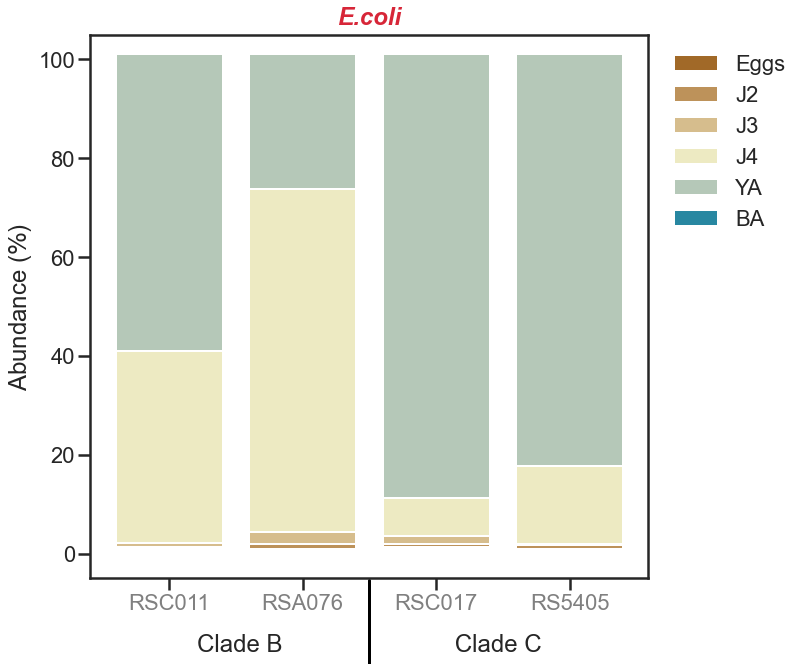

In [29]:
grad = ['#A16928','#bd925a','#d6bd8d','#edeac2','#b5c8b8','#2887a1'] 

fig, ax = plt.subplots(1, 1, figsize=(10,10))

for ind, pos in zip(['RSC011','RSA076', 'RSC017', 'RS5405'], [0, 1, 2, 3]):
    count = 0
    bot = 1
    for stage in ['Eggs', 'J2', 'J3', 'J4', 'YA', 'BA']:
        val = dev_isolates[(dev_isolates['Strain']==ind) & (dev_isolates['Stage']==stage)]['Percentage']
        ax.bar(pos, val, bottom=bot, color=grad[count], label=stage)
        bot += float(val)
        count += 1
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['RSC011','RSA076', 'RSC017', 'RS5405'], color='gray')        

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles[:6], labels[:6], bbox_to_anchor=(1.01, 1),frameon=False)

ax.set_ylabel(r'Abundance ($\%$)')
ax.set_ylim(-5, 105)
ax.set_xlabel(r'Clade B                          Clade C', labelpad=20)
plt.vlines(1.5, -40, -5.3,  colors='black', linestyles='-', linewidth=3, capstyle='round',clip_on=False)

plt.title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)
plt.savefig('./fig2f.jpeg', bbox_inches='tight', dpi=300)

### Fig 3a

In [33]:
mf_isolate = pd.read_csv('./raw_data/fig3/MF_on_novo_op50_n.csv')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 22 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains 

/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 21 seconds.


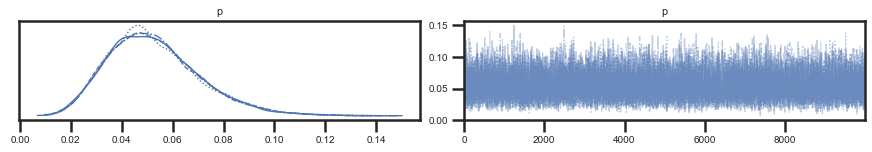

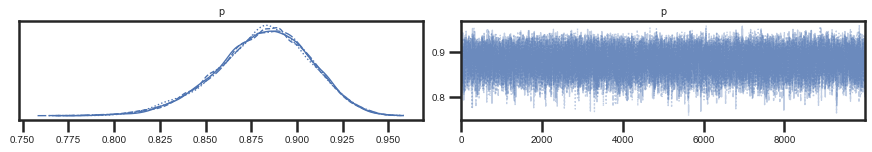

In [38]:
strain = 'RSC017'

data = {}
name = strain + '_op50'
data[name] = find_binom_HDI(mf_isolate, strain, 'OP50')
name = strain + '_novo'
data[name] = find_binom_HDI(mf_isolate, strain, 'Novo')

In [39]:
mf_isolate['Prop'] = mf_isolate['Prop']/100

<Figure size 720x720 with 0 Axes>

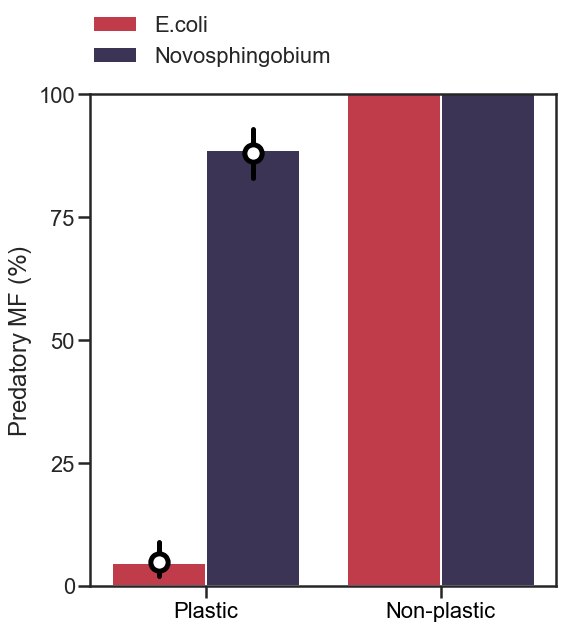

In [68]:
fig = plt.figure(figsize=(10,10))
g = sns.catplot(data=mf_isolate, aspect=1, x="Strain", y='Prop', kind="bar", ci=None, hue='Culture',order=['RSC017','RS5405'], alpha=1, height=8, palette={"Novo": '#392F5A', "OP50": '#D72638'})
g._legend.remove()
g.set_xticklabels(['Plastic', 'Non-plastic'], rotation=0, color='black')

g.set_ylabels(r'Predatory MF ($\%$)')
g.set_xlabels(r'', labelpad=10)

plt.yticks(np.linspace(0,1, 5), labels=[0, 25, 50, 75, 100])

plt.vlines(-0.2, float(data['RSC017_op50']['hdi_2.5%']), float(data['RSC017_op50']['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
plt.scatter(-0.2, float(data['RSC017_op50']['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)

plt.vlines(0.2, float(data['RSC017_novo']['hdi_2.5%']), float(data['RSC017_novo']['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
plt.scatter(0.2, float(data['RSC017_novo']['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)    
    
# plt.vlines(j, float(data[i+'_op50']['hdi_2.5%']), float(data[i+'_op50']['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
# plt.scatter(j, float(data[i+'_op50']['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)


# for i,j in zip(strains, [-0.2, 0.8]):
#     plt.vlines(j, float(data[i+'_op50']['hdi_2.5%']), float(data[i+'_op50']['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
#     plt.scatter(j, float(data[i+'_op50']['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)
    
#     plt.vlines(j + 0.4, float(data[i+'_novo']['hdi_2.5%']), float(data[i+'_novo']['hdi_97.5%']),  colors='black', linestyles='-', linewidth=5, capstyle='round', label='95% HDI',clip_on=False, zorder=2)
#     plt.scatter(j + 0.4, float(data[i+'_novo']['mean']), zorder=2, s=300, edgecolors='black', color='white', linewidths=5)
    

sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)    



handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles[2:], ["E.coli","Novosphingobium"] , bbox_to_anchor=(0.56, 1.2),frameon=False)

plt.ylim(0, 1)
plt.savefig('./fig3a.jpeg', bbox_inches='tight', dpi=300)

In [57]:
labels

['95% HDI', '95% HDI', 'OP50', 'Novo']

### Fig 3b

In [45]:
fec_isolate = pd.read_excel('./raw_data/fig3/fecundity_novo_op50.xlsx')

In [48]:
strains = ['RSC017','RS5405']
stat_dic = {}
diff_positive = {}
for strain in strains:
    sample_1 = fec_isolate[(fec_isolate['Strain']==strain) & (fec_isolate['Culture Condition']=="Novosphingobium sp.")]["Total Progeny Count"]
    sample_2 = fec_isolate[(fec_isolate['Strain']==strain) & (fec_isolate['Culture Condition']=="E. coli ")]["Total Progeny Count"]
    output = bayesian_robust_two_groups(sample_1, sample_2, step=10000)
    stat_dic[strain], diff_positive[strain] = output

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/akalirad/anaconda3/envs/current_env/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 27 seconds.


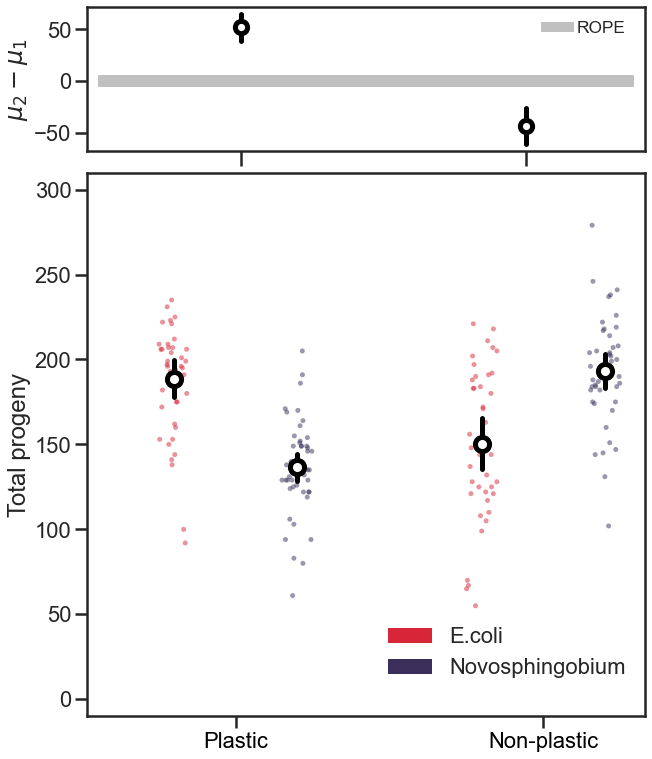

In [49]:
fig = plt.figure(figsize=(10,10))

g = sns.stripplot(data=fec_isolate, x="Strain", y="Total Progeny Count", hue='Culture Condition', hue_order=["E. coli ", "Novosphingobium sp."],  zorder=0, dodge=True, alpha=0.5, order=strains, palette={"E. coli ": '#D72638', "Novosphingobium sp.": '#392F5A'})

g.set_xticklabels(['Plastic', 'Non-plastic'], rotation=0, color='black')

g.set_ylabel('Total progeny')

space=0.2
for i in strains:
    plt.vlines(space, float(stat_dic[i]['hdi_2.5%']['group1_mean']), float(stat_dic[i]['hdi_97.5%']['group1_mean']),  colors='black', linestyles='-', linewidth=5, capstyle='round', clip_on=False, zorder=2)
    plt.scatter(space, float(stat_dic[i]['mean']['group1_mean']), zorder=2, s=200, edgecolors='black', color='white', linewidths=5)
    plt.vlines(space-0.4, float(stat_dic[i]['hdi_2.5%']['group2_mean']), float(stat_dic[i]['hdi_97.5%']['group2_mean']),  colors='black', linestyles='-', linewidth=5, capstyle='round', clip_on=False, zorder=2)
    plt.scatter(space-0.4, float(stat_dic[i]['mean']['group2_mean']), zorder=2, s=200, edgecolors='black', color='white', linewidths=5)
    space += 1
plt.ylim(-10, 310)

plt.xlabel(r'',labelpad=20)
plt.bar(0,0, edgecolor='black',linewidth=0, color= '#D72638', label="E.coli")
plt.bar(0,0, edgecolor='black',linewidth=0, color= '#392F5A', label="Novosphingobium")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[2:], labels[2:], bbox_to_anchor=(1.001, 0.2),frameon=False)

ax2 = fig.add_axes([0.125, 0.91, 0.775, 0.2])
for i,j in zip(strains, [0.6, 3]):
    ax2.vlines(j, -1*stat_dic[i]['hdi_2.5%']['difference of means'], -1*stat_dic[i]['hdi_97.5%']['difference of means'],  colors='black', linestyles='-', linewidth=5, capstyle='round',clip_on=False, zorder=10)
    ax2.scatter(j, -1*stat_dic[i]['mean']['difference of means'], s=150, edgecolors='black', color='white', linewidths=5, zorder=12)

x = np.linspace(-0.6, 3.9, 10)
ax2.fill_between(x, [5 for i in x], [-5 for i in x], color='silver')

ax2.bar(-10,0, color= "silver", label="ROPE")

ax2.legend(loc=(0.8,0.75),frameon=False, edgecolor='white', fontsize='xx-large', handletextpad=0.1)

ax2.set_ylabel(r'$\mu_2 - \mu_{1}$')


ax2.set_xlim(-0.7, 4)
ax2.set_xticks([0.6, 3])
ax2.set_xticklabels([])
ax2.tick_params(axis='x', length=15)

plt.savefig('./fig3b.jpeg', bbox_inches='tight', dpi=300)

### Table S8

In [50]:
df = pd.concat([stat_dic[i] for i in strains], axis=0, keys=strains)

In [51]:
df.style.to_latex('./fig3b_stat.tex')

### Figure 3c

In [52]:
dev_isolate = pd.read_excel('./raw_data/fig3/dev_speed_novo_op50.xlsx')

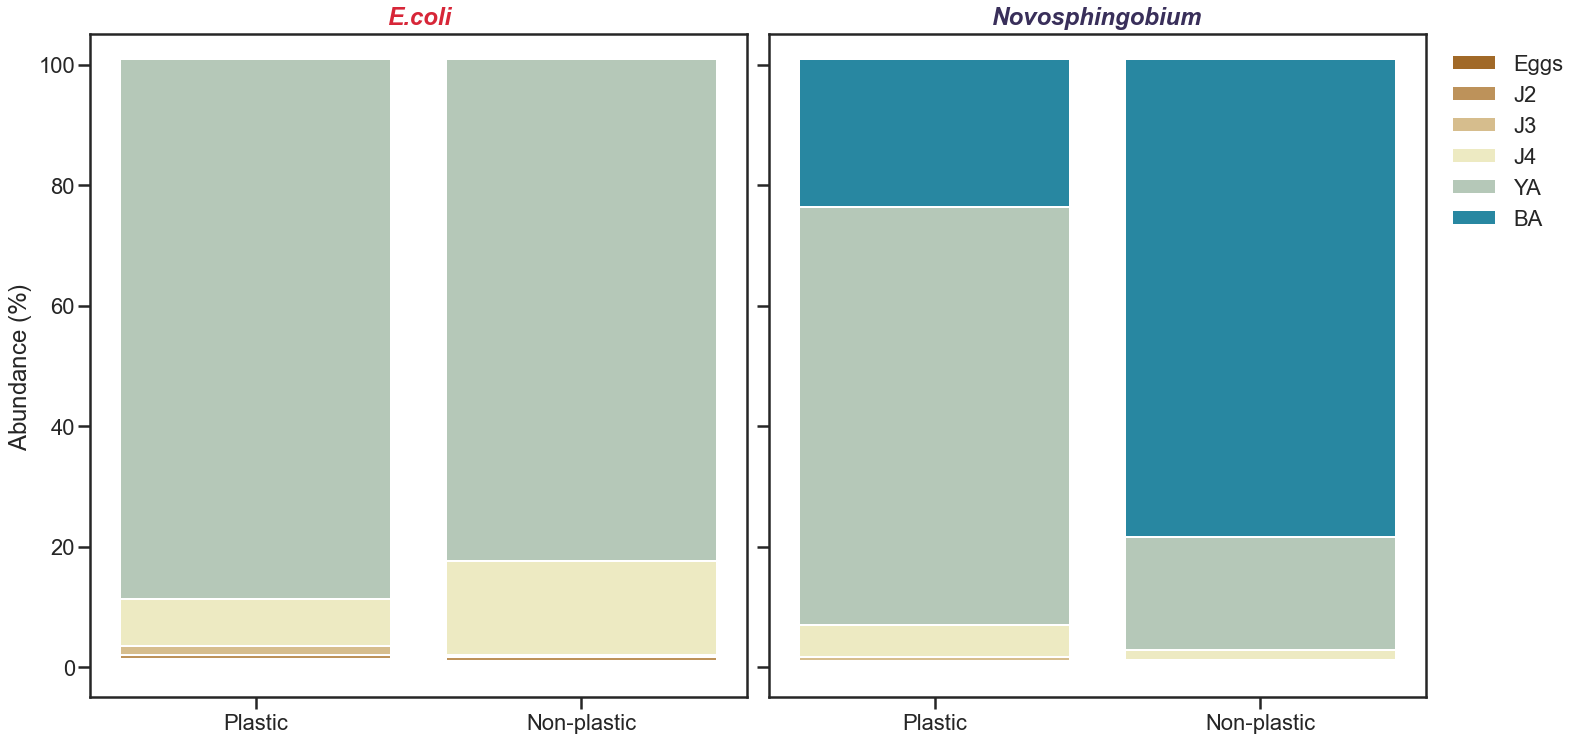

In [53]:
grad = ['#A16928','#bd925a','#d6bd8d','#edeac2','#b5c8b8','#2887a1'] 

fig, ax = plt.subplots(1, 2, figsize=(20,10))

for ind, pos in zip(['RSC017', 'RS5405'], [0, 0.6]):
    count = 0
    bot = 1
    for stage in ['Eggs', 'J2', 'J3', 'J4', 'YA', 'BA']:
        val = dev_isolate[(dev_isolate['Strain']==ind) & (dev_isolate['Stage']==stage) & (dev_isolate['Condition ']=='E.coli')]['Percentage']
        ax[0].bar(pos, val, bottom=bot, color=grad[count], width=0.5)
        bot += float(val)
        count += 1
ax[0].set_ylabel(r'Abundance ($\%$)')
ax[0].set_xticks([0, 0.6])
ax[0].set_xticklabels(['Plastic', 'Non-plastic'])   

for ind, pos in zip(['RSC017', 'RS5405'], [0, 0.6]):
    count = 0
    bot = 1
    for stage in ['Eggs', 'J2', 'J3', 'J4', 'YA', 'BA']:
        val = dev_isolate[(dev_isolate['Strain']==ind) & (dev_isolate['Stage']==stage) & (dev_isolate['Condition ']=='Novosphingobium sp.')]['Percentage']
        ax[1].bar(pos, val, bottom=bot, color=grad[count], label=stage, width=0.5)
        bot += float(val)
        count += 1
ax[1].set_xticks([0, 0.6])
ax[1].set_xticklabels(['Plastic', 'Non-plastic']) 
ax[0].set_ylim(-5, 105)
ax[1].set_ylim(-5, 105)
ax[1].set_yticklabels([])
handles, labels = plt.gca().get_legend_handles_labels()
fig.tight_layout()
plt.legend(handles[:6], labels[:6], bbox_to_anchor=(1.01, 1),frameon=False)
ax[0].set_title('E.coli', fontstyle='italic', weight='bold', color='#D72638', pad=10)
ax[1].set_title('Novosphingobium', fontstyle='italic', weight='bold', color='#392F5A', pad=10)
plt.savefig('./fig3c.jpeg', bbox_inches='tight', dpi=300)

### Figure 4d

In [70]:
killing_ecoli = pd.read_csv('./raw_data/fig4/Ecoli_killing.csv', sep=';')
killing_novo = pd.read_csv('./raw_data/fig4/novo_killing.csv', sep=';')

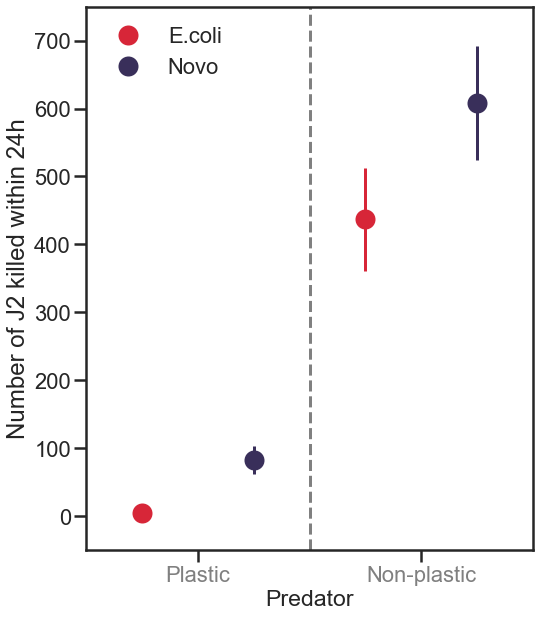

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(8,10))

x1 = killing_ecoli[(killing_ecoli['predator']=='RSC017') & (killing_ecoli['prey']=='RS5405')]['Corpses']
x2 = killing_novo[(killing_novo['predator']=='RSC017') & (killing_novo['prey']=='RS5405')]['Corpses']

y1 = killing_ecoli[(killing_ecoli['predator']=='RS5405') & (killing_ecoli['prey']=='RSC017')]['Corpses']
y2 = killing_novo[(killing_novo['predator']=='RS5405') & (killing_novo['prey']=='RSC017')]['Corpses']

plt.errorbar(0, 0, fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=True, 
    mew=0.01, elinewidth=3,color='#D72638', label='E.coli')
plt.errorbar(0, 0, fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=True, 
    mew=0.01, elinewidth=3,color='#392F5A', label='Novo')

plt.errorbar(1,np.mean(x1), 
    yerr=np.std(x1), 
    fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, 
    mew=0.01, elinewidth=3, color='#D72638', ecolor='#D72638')

plt.errorbar(2,np.mean(x2), 
    yerr=np.std(x2), 
    fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, 
    mew=0.01, elinewidth=3, color='#392F5A', ecolor='#392F5A')

plt.errorbar(3,np.mean(y1), 
    yerr=np.std(y1), 
    fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, 
    mew=0.01, elinewidth=3, color='#D72638', ecolor='#D72638')

plt.errorbar(4,np.mean(y2), 
    yerr=np.std(y2), 
    fmt='o', linewidth=3, capsize=0, zorder=3, markersize=20, clip_on=False, 
    mew=0.01, elinewidth=3, color='#392F5A', ecolor='#392F5A')

ax.set_ylabel(r"Number of J2 killed within 24h")
#ax.set_xlabel(r"Number of J2 killed within 24h")
plt.xlabel(r"Predator", fontsize=23)
xticks = [ 1.5, 3.5]
xticks_minor = [ 1.5, 3.5]
xlbls = [ 'Plastic', 'Non-plastic']
ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True )
ax.set_xticklabels( xlbls, color='grey')
ax.set_ylim(-50, 750)
ax.set_xlim(0.5,4.5)
plt.vlines(2.5, -50, 750,  colors='grey', linestyles='--', clip_on=False)
ax.legend(loc='upper left',frameon=False)
plt.savefig('./fig4d.pdf', bbox_inches='tight', dpi=300)

In [54]:
%load_ext watermark
%watermark -n -u -v -iv -w -p graphviz

Last updated: Fri Aug 26 2022

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.4.0

graphviz: not installed

seaborn   : 0.11.2
numpy     : 1.22.3
matplotlib: 3.5.1
arviz     : 0.11.2
pandas    : 1.4.3
pymc3     : 3.11.4

Watermark: 2.3.1

